In [ ]:
# Copyright 2023 - Olman Ureña
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# **Generative AI On Google Cloud - Demo**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/olmaneuh/olmaneuh-expo/blob/main/power-up-your-applications-with-generative-ai-and-google-cloud/generative_ai_on_google_cloud_demo.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run In Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/olmaneuh/olmaneuh-expo/blob/main/power-up-your-applications-with-generative-ai-and-google-cloud/generative_ai_on_google_cloud_demo.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View On GitHub
    </a>
  </td>
</table>

## **Overview**
This notebook provides some examples and information about how to use [Generative AI](https://cloud.google.com/ai/generative-ai) on [Google Cloud](https://cloud.google.com/).

The first example, [**_"Vertex AI - Generative AI Studio"_**](https://colab.research.google.com/drive/1qHJbWIrSJX610S5_zAb_Un3RhU71P0cB#scrollTo=uu7fxWRxyKg0&line=1&uniqifier=1) is a quick demo about how to use Vertex AI Generative AI Studio's User Interface for quick prototyping, also it will show some examples of the different **Promp Desing** types used to shape the model's response.

In the last example, [**_"Fashion Product Description Generator"_**](https://colab.research.google.com/drive/1qHJbWIrSJX610S5_zAb_Un3RhU71P0cB#scrollTo=oJFLrMTEUDHx&line=1&uniqifier=1) it is going to be used the [Cloud Vision API](https://cloud.google.com/vision) to get some general information about the product and then the PaLM model to generate the marketing description.

## **Setup And Requirements**
* Sign in to Cloud Console and create a new project ([How to create a Google Cloud project](https://developers.google.com/workspace/guides/create-project)).
* Enable billing in Cloud Console in order to use Google Cloud resources ([New users of Google Cloud are eligible for the $300USD Free Trial program](https://cloud.google.com/free/docs/free-cloud-features)).
* [Enable the Cloud Vision API and the Vertex AI API.](https://cloud.google.com/apis/docs/getting-started#enabling_apis)
* [Create a Service Account for this Notebook](https://cloud.google.com/iam/docs/creating-managing-service-accounts#iam-service-accounts-create-console).
* [Create a Service Account Key used for authentication](https://cloud.google.com/iam/docs/creating-managing-service-account-keys#iam-service-account-keys-create-console).

>**Important:**
>
>Running through this Notebook will cost you **USD ($)**. Be sure to follow any instructions in the _"Cleaning Up"_ section which advises you how to shut down resources so you don't incur billing.

## **1. Vertex AI - Generative AI Studio**

* [**Vertex AI:**](https://cloud.google.com/vertex-ai) is a machine learning platform that lets you train and deploy ML models and AI applications, and customize large language models for use in your AI-powered applications.

* [**Generative AI Studio:**](https://cloud.google.com/generative-ai-studio) is a Google Cloud console tool for rapidly prototyping and testing generative AI models.

* **Check the docs:**
  * [Vertext AI Documentation.](https://cloud.google.com/vertex-ai/docs/start/introduction-unified-platform)
  * [Generative AI Studio Documentation.](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/generative-ai-studio)
  * [Generative AI For Developers Video Series.](https://www.youtube.com/playlist?list=PLIivdWyY5sqLRCzKJyixrIDPQKwU6XHpn)
  * [Available Models In Generative AI Studio.](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models)

* **To Review:**
  * [Generative AI for Developers.](https://developers.generativeai.google/)
  * [Google MakerSuite.](https://makersuite.google.com/)
  * [PaLM API.](https://developers.generativeai.google/guide/palm_api_overview)

## **2. Fashion Product Description Generator**

### **2.1 Problem Overview**

Create marketing/advertising quality product descriptions for some fashion products, the marketing team will be able to give you only the images of each product.

### **2.2 Solution**

Use the Cloud Vision API to get some of the characteristics of the product and then use the PaLM model to generate a marketing quality description.

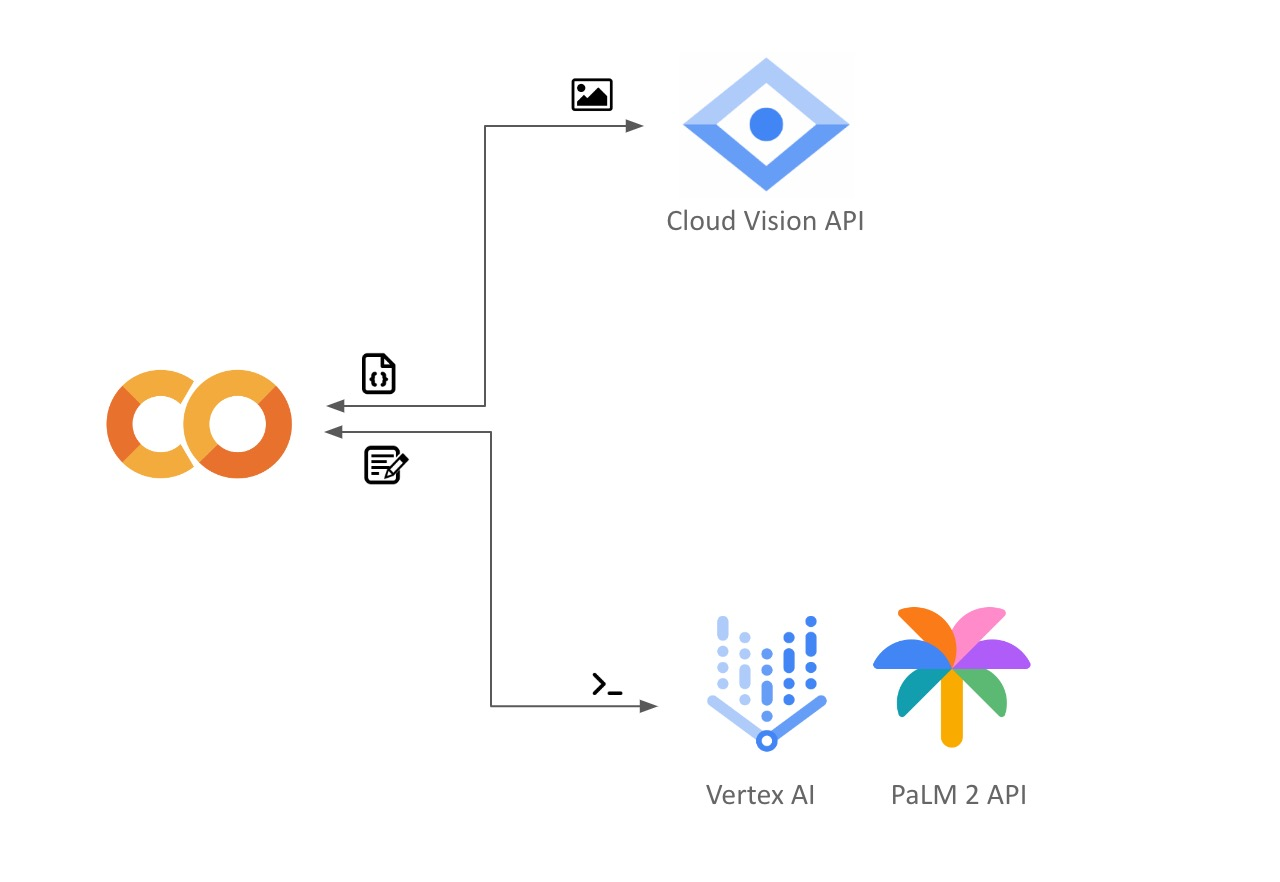

### **2.3 Getting Started**

#### 2.3.1 Install The Cloud Vision And Vertex AI SDK

In [1]:
# Install Cloud Vision Client Library For Python
!pip install google-cloud-vision --upgrade --quiet --user

In [2]:
# install Vertex AI SDK
!pip install google-cloud-aiplatform --upgrade --quiet --user

#### 2.3.2 Restart The Kernel

In [3]:
# Automatically restart kernel after installs so that your environment can
# access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

#### 2.3.3 Upload The Service Account Key

As a best practice, Google recommends the use of service account authorization when calling APIs.

A service account private key file can be used to obtain credentials for a service account. Once you have a private key you can set the `GOOGLE_APPLICATION_CREDENTIALS` environment variable to the full path to your service account private key file to it can be accessed.

In [1]:
from google.colab import files
import os

# upload files to Colab
uploaded = files.upload()

for file_name in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=file_name, length=len(uploaded[file_name])))

    # create an environment variable
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = file_name
    print("Service Account Key: {}".format(
        os.environ["GOOGLE_APPLICATION_CREDENTIALS"]))

Saving generative-ai-on-gcp-demo-de4c7b863a39.json to generative-ai-on-gcp-demo-de4c7b863a39 (2).json
User uploaded file "generative-ai-on-gcp-demo-de4c7b863a39 (2).json" with length 2391 bytes
Service Account Key: generative-ai-on-gcp-demo-de4c7b863a39 (2).json


#### 2.3.4 Initialize The Vertex AI SDK

In [2]:
import vertexai

PROJECT_ID = "generative-ai-on-gcp-demo"
vertexai.init(project=PROJECT_ID, location="us-central1")

#### 2.3.5 Import Libraries

In [3]:
import cv2
import io
import matplotlib.pyplot as plt

from google.cloud import aiplatform
from google.cloud import vision
from google.colab import files
from IPython.display import Markdown as md
from vertexai.preview.language_models import TextGenerationModel

#### 2.3.6 Define The PaLM Model

In [4]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

#### 2.3.7 Define Utility Methods

In [22]:
def upload_product_imgs():
    """Uploads product images and displays them.

    Returns:
        A list of the uploaded images.
    """
    imgs = []
    uploaded_imgs = files.upload()

    for file_name in uploaded_imgs.keys():
        imgs.append(file_name)

    # displaying uploaded images
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(uploaded_imgs):
        img_to_display = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
        ax = plt.subplot(1, 3, i+1)
        plt.imshow(img_to_display)

    return imgs


def get_product_details(img_path):
    """Returns the product type and some descriptive features.

    Args:
        img_path: The path to the image file.

    Returns:
        product_type: The type of the product.
        product_features: A list of descriptive features of the product.
    """
    client = vision.ImageAnnotatorClient()

    with io.open(img_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.object_localization(image=image).localized_object_annotations
    product_type = response[0].name

    response = client.label_detection(image=image).label_annotations
    product_features = [label.description for label in response]

    return product_type, product_features


def create_prompt(product_type, product_features):
    """Generates a product description.

    Args:
        product_type: The type of product.
        product_features: A list of product features.

    Returns:
        A product description.
    """
    prompt = "Imagine you are a digital marketer working for a retail organization.\n"
    prompt += "You are an expert in building detailed and catchy descriptions for the retail fashion products on your website.\n"
    prompt += "Generate a product description that describes a {} product with the following descriptive features: {}.\n".format(
        product_type, product_features)
    prompt += "Add a call to action at the end."

    return prompt


def generate_marketing_description(model, prompt, temperature=0):
    """Generates a marketing description.

    Args:
        model: The language model.
        prompt: The prompt text.
        temperature: The temperature of the generation.

    Returns:
        A marketing description.
    """
    description = model.predict(
        prompt,
        temperature=temperature,
        max_output_tokens=1024,
        top_k=40,
        top_p=0.8
        )

    return description.text

### **2.4 Test The Solution**

Saving jacket.jpg to jacket (4).jpg
Saving jordans.jpg to jordans (4).jpg
Saving sunglasses.jpg to sunglasses (4).jpg


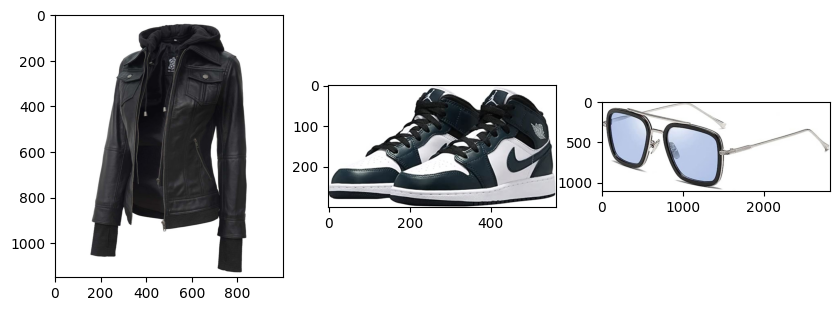

In [23]:
product_imgs = upload_product_imgs()


----------------------------  0  ----------------------------

Product Type:  Outerwear
Product Features: ['Sleeve', 'Leather jacket', 'Collar', 'Fashion design', 'Electric blue', 'Magenta', 'Fashion accessory', 'Font', 'Leather', 'Brand']

---------------------------------------------------------------

Prompt:

Imagine you are a digital marketer working for a retail organization.
You are an expert in building detailed and catchy descriptions for the retail fashion products on your website.
Generate a product description that describes a Outerwear product with the following descriptive features: ['Sleeve', 'Leather jacket', 'Collar', 'Fashion design', 'Electric blue', 'Magenta', 'Fashion accessory', 'Font', 'Leather', 'Brand'].
Add a call to action at the end.

---------------------------------------------------------------



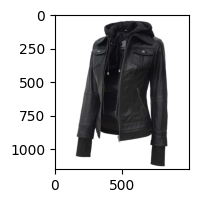


 **Product Description**

This electric blue leather jacket is a must-have for any fashion-forward woman. The magenta collar and cuffs add a touch of personality, while the sleek design and fitted silhouette make it perfect for any occasion.

This jacket is made from high-quality leather and features a front zip closure, two front pockets, and a button-down collar. It's also fully lined for warmth and comfort.

Whether you're running errands or going out on the town, this leather jacket will turn heads wherever you go. Order yours today!

**Call to Action**

Add this stylish leather jacket to your cart today and start turning heads!

----------------------------  1  ----------------------------

Product Type:  Footwear
Product Features: ['Footwear', 'Shoe', 'Sneakers', 'Walking shoe', 'Grey', 'Sportswear', 'Font', 'Electric blue', 'Athletic shoe', 'Design']

---------------------------------------------------------------

Prompt:

Imagine you are a digital marketer working for a retai

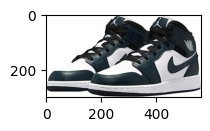


 Looking for a new pair of sneakers that will take you from the gym to the streets in style? Look no further than these grey and electric blue athletic shoes! With their sleek design and comfortable fit, these sneakers are sure to become your new go-to pair.

**Features:**

* Grey and electric blue color scheme
* Athletic shoe design
* Comfortable fit
* Breathable fabric
* Flexible sole
* Lace-up closure

**Benefits:**

* Makes a statement wherever you go
* Perfect for any activity
* Keeps your feet cool and comfortable
* Provides support and stability
* Easy to put on and take off

**Call to action:**

**Shop now and get these sneakers for a limited time only!**

----------------------------  2  ----------------------------

Product Type:  Sunglasses
Product Features: ['Glasses', 'Vision care', 'Goggles', 'Sunglasses', 'Eyewear', 'Eye glass accessory', 'Automotive design', 'Material property', 'Tints and shades', 'Font']

--------------------------------------------------------------

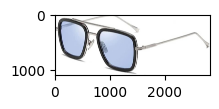


 **Sunglasses with Automotive Design and Tints and Shades**

Looking for a pair of sunglasses that will make you stand out from the crowd? Look no further than these sunglasses with automotive design and tints and shades! These sunglasses are made with high-quality materials and construction, and they feature a unique design that will turn heads wherever you go.

The automotive design of these sunglasses is inspired by the sleek lines and curves of modern cars. The lenses are made with a durable polycarbonate material that is scratch-resistant and shatterproof, and they feature a variety of tints and shades to choose from.

These sunglasses are perfect for a variety of activities, from driving to running errands to just relaxing on the beach. They're also great for people who have vision problems, as they come with a variety of prescription options.

So what are you waiting for? Order your pair of sunglasses with automotive design and tints and shades today!

**Call to action:**

Clic

In [30]:
for i, img in enumerate(product_imgs):
    product_type, product_features = get_product_details(img)
    prompt = create_prompt(product_type, product_features)
    marketing_description = generate_marketing_description(generation_model, prompt, temperature=0.2)

    # display results
    print('\n----------------------------  '+ str(i) +'  ----------------------------\n')
    print('Product Type: ', product_type)
    print('Product Features:', product_features)
    print('\n---------------------------------------------------------------\n')
    print('Prompt:\n')
    print(prompt)
    print('\n---------------------------------------------------------------\n')
    img_to_display = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(2, 2))
    plt.imshow(img_to_display)
    plt.show()
    print('\n', marketing_description)

## **Cleaning Up**
To clean up all resources used in this Notebook, you can [delete the Google Cloud project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used.